# 13-9. 프로젝트: Face2Emoji 모바일 웹앱

## 필요한 모듈 import

In [1]:
import numpy as np
import tqdm
import os

import tensorflow as tf

from matplotlib import pyplot as plt

## 표정 데이터로 MobileNet 학습하기

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = 'data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm.tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')

        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:27<00:00, 1317.38it/s]

train : 32298, eval :3589


Angry


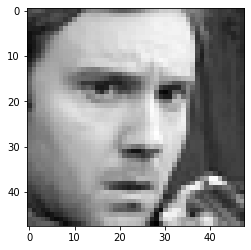

In [3]:
# 첫번째 데이터 확인
LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [4]:
# MobileNet 모델 학습하기

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x), tf.keras.utils.to_categorical(train_y), epochs=100, batch_size=512, validation_data=(np.stack(eval_x), tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
64/64 [==============================] - 36s 558ms/step - loss: 1.8365 - categorical_accuracy: 0.2442 - val_loss: 1.9309 - val_categorical_accuracy: 0.2449
Epoch 2/100
64/64 [==============================] - 6s 100ms/step - loss: 1.6822 - categorical_accuracy: 0.3214 - val_loss: 1.9203 - val_categorical_accuracy: 0.2449
Epoch 3/100
64/64 [==============================] - 6s 101ms/step - loss: 1.5882 - categorical_accuracy: 0.3726 - val_loss: 1.9129 - val_categorical_accuracy: 0.2449
Epoch 4/100
64/64 [==============================] - 6s 100ms/step - loss: 1.4853 - categorical_accuracy: 0.4234 - val_loss: 1.9145 - val_categorical_accuracy: 0.2449
Epoch 5/100
64/64 [==============================] - 6s 101ms/step - loss: 1.4066 - categorical_accuracy: 0.4612 - val_loss: 1.9192 - val_categorical_accuracy: 0.2449
Epoch 6/100
64/64 [==============================] - 6s 101ms/step - loss: 1.3216 - categorical_accuracy: 0.4923 - val_loss: 1.9206 - val_categorical_accuracy: 0.16

64/64 [==============================] - 7s 103ms/step - loss: 0.1368 - categorical_accuracy: 0.9536 - val_loss: 2.5357 - val_categorical_accuracy: 0.1655
Epoch 49/100
64/64 [==============================] - 7s 103ms/step - loss: 0.2194 - categorical_accuracy: 0.9231 - val_loss: 2.4798 - val_categorical_accuracy: 0.1655
Epoch 50/100
64/64 [==============================] - 7s 102ms/step - loss: 0.1114 - categorical_accuracy: 0.9612 - val_loss: 2.6082 - val_categorical_accuracy: 0.1691
Epoch 51/100
64/64 [==============================] - 7s 102ms/step - loss: 0.1973 - categorical_accuracy: 0.9320 - val_loss: 2.5074 - val_categorical_accuracy: 0.1744
Epoch 52/100
64/64 [==============================] - 7s 103ms/step - loss: 0.1712 - categorical_accuracy: 0.9399 - val_loss: 2.5736 - val_categorical_accuracy: 0.1744
Epoch 53/100
64/64 [==============================] - 7s 102ms/step - loss: 0.1506 - categorical_accuracy: 0.9483 - val_loss: 2.5998 - val_categorical_accuracy: 0.1741
Epoch

Epoch 97/100
64/64 [==============================] - 7s 102ms/step - loss: 0.0810 - categorical_accuracy: 0.9714 - val_loss: 5.1683 - val_categorical_accuracy: 0.3965
Epoch 98/100
64/64 [==============================] - 7s 102ms/step - loss: 0.1713 - categorical_accuracy: 0.9418 - val_loss: 5.5765 - val_categorical_accuracy: 0.4324
Epoch 99/100
64/64 [==============================] - 6s 101ms/step - loss: 0.1171 - categorical_accuracy: 0.9591 - val_loss: 5.7202 - val_categorical_accuracy: 0.4079
Epoch 100/100
64/64 [==============================] - 7s 102ms/step - loss: 0.0723 - categorical_accuracy: 0.9742 - val_loss: 5.6126 - val_categorical_accuracy: 0.4324


## 학습된 모델을 tensorflow.js 형식으로 변환하기

In [5]:
model_path = 'model.h5'
model.save(model_path)

'''
$ pip install tensorflowjs
$ tensorflowjs_converter --input_format=keras model.h5 model
'''

'\n$ pip install tensorflowjs\n$ tensorflowjs_converter --input_format=keras model.h5 model\n'

## 카메라에서 가져온 영상 전처리하기